# Početna analiza

Prije učenja klasifikatora, izvršit ćemo neke jednostavnije analize skupa za učenje kako bismo vidjeli kakvim podatcima raspolažemo i eventualno uočili neka pravila ili međusobne ovisnosti svojstava i ishoda. Također, na skupu primjera za učenje želimo provjeriti neke tvrdnje koje smatramo zanimljivima i korisnima za daljnje istraživanje. 

Na početku, prikazujemo podjelu skupa na vrste životinja.

U skupu za ucenje imamo 58.34486886901867% pasa i 41.65513113098133% macaka.


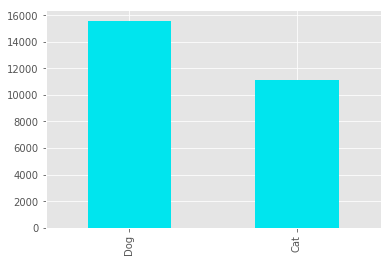

In [2]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

train_data = pd.read_csv('data/clean_train.csv', encoding="ISO-8859-1")

animalType = train_data['AnimalType'].value_counts()
animalType.plot(kind='bar', color='#00E5EE')

dog_percentage = (len(train_data[train_data['AnimalType'] == 'Dog']) * 100)/len(train_data)
cat_percentage = (len(train_data[train_data['AnimalType'] == 'Cat']) * 100)/len(train_data)

print("U skupu za ucenje imamo " + str(dog_percentage) + "% pasa i " 
      + str(cat_percentage) + "% macaka.")

Pogledajmo sada i klase u koje su životinje svrstane te njihovu zastupljenost u skupu za učenje.

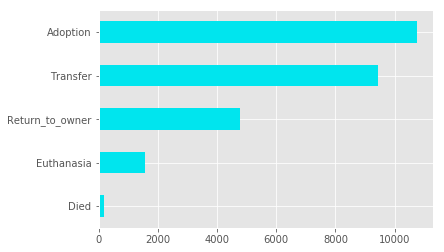

In [4]:
outcomeType = train_data.OutcomeType.value_counts().sort_values()
outcomeType.plot(kind='barh', color='#00E5EE')

Na sljedećem su grafu prikazane podjele pasa i mačaka na navedenih pet klasa.

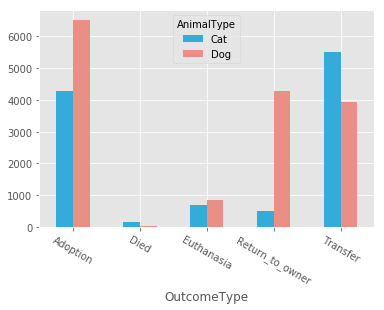

In [5]:
animalTypeOutcome = train_data[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack()

animalTypeOutcome.plot(kind='bar',color=['#34ABD8','#E98F85'],rot=-30)

In [6]:
# show the percentage of adopted dogs and adopted cats
dogs = train_data[train_data['AnimalType'] == 'Dog']
cats = train_data[train_data['AnimalType'] == 'Cat']
num_dogs = len(dogs)
num_cats = len(cats)
adoption_per_dogs = (100 * len(dogs[dogs['OutcomeType'] == 'Adoption']))/num_dogs
adoption_per_cats = (100 * len(cats[cats['OutcomeType'] == 'Adoption']))/num_cats

print(str(adoption_per_dogs) + "% of dogs have been adopted")
print(str(adoption_per_cats) + "% of cats have been adopted")

41.66078871433152% of dogs have been adopted
38.368959942518416% of cats have been adopted


Dakle, oko 41,7% pasa i oko 38,4% mačaka klasificirano je kao 'Adoption'. Prikažimo klasu 'Adoption':

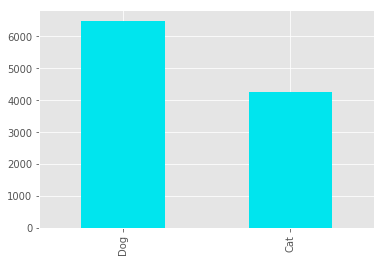

In [7]:
adopted = train_data[train_data['OutcomeType'] == 'Adoption']
adopted_type = adopted['AnimalType'].value_counts()
adopted_type.plot(kind='bar', color='#00E5EE')

Pogledajmo koliki je postotak pasa i mačaka u prikazanoj klasi. Ako je sličan onome u početnom skupu (što se po grafovima čini da jest), onda možemo reći da je za pse i mačke vjerojatnost usvajanja podjednaka.

In [21]:
adopted_dog_percentage = (len(adopted[adopted['AnimalType'] == 'Dog']) * 100)/len(adopted)
adopted_cat_percentage = (len(adopted[adopted['AnimalType'] == 'Cat']) * 100)/len(adopted)

print("U skupu klasificaranom s \'Adoption\' imamo " + str(adopted_dog_percentage) + "% pasa i " 
      + str(adopted_cat_percentage) + "% macaka.")

U skupu klasificaranom s 'Adoption' imamo 60.33057851239669% pasa i 39.66942148760331% macaka.


Jedna je od naših tvrdnji bila da je vjerojatnost udomljavanja za pse i mačke podjednaka, što smatramo potvrđenim na danom skupu za učenje.

Sljedeće što nas zanima jest možemo li davanjem imena životinji povećati vjerojatnost pozitivnog ishoda. Inače ćemo pozitivnim ishodom smatrati udomljavanje i povratak vlasniku, no u ovom ćemo slučaju zasebno provjeravati svaku klasu. Naime, smatramo da, ukoliko je životinja već imala i vlasnika i vlasnik joj je dao ime, ono ime koje je dobila u skloništu neće utjecati na njezin povratak vlasniku.

## Svojstvo prisustva imena

Pogledajmo prvo koliko životinja iz promatranog skupa za učenje ima ime.
Na grafu je prisustvo imena označeno s '1', a odsustvo s '0'.

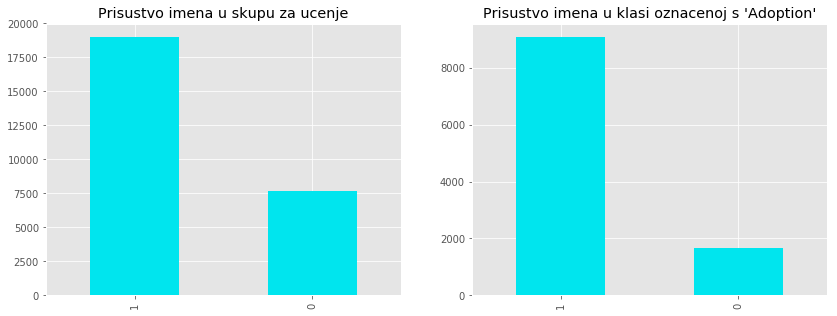

In [20]:
# first show how many animals of the given set have names
fig = plt.figure(figsize=(14,5))

named_distribution = train_data['hasName'].value_counts()
fig.add_subplot(1, 2, 1)
named_distribution.plot(kind='bar', color='#00E5EE', title='Prisustvo imena u skupu za ucenje')

adopted_named_distribution = adopted['hasName'].value_counts()
fig.add_subplot(1, 2, 2) 
adopted_named_distribution.plot(kind='bar', color='#00E5EE', 
                                                title='Prisustvo imena u klasi oznacenoj s \'Adoption\'')


Prema gornjim grafovima, mogli bismo reći da bi davanje imena životinji doista moglo poboljšati njezine šanse za udomljavanje. No, pogledajmo još kakva je točno distribucija po klasama za imenovane i neimenovane životinje.

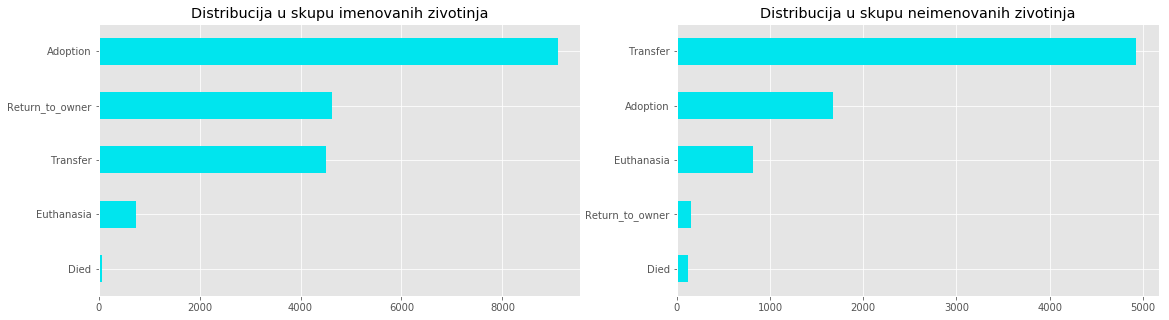

In [26]:
fig = plt.figure(figsize=(19, 5))

outcomeTypeNamed = train_data[train_data['hasName'] == 1].OutcomeType.value_counts().sort_values()
outcomeTypeNotNamed = train_data[train_data['hasName'] == 0].OutcomeType.value_counts().sort_values()

fig.add_subplot(1, 2, 1)
outcomeTypeNamed.plot(kind='barh', color='#00E5EE', title='Distribucija u skupu imenovanih zivotinja')

fig.add_subplot(1, 2, 2)
outcomeTypeNotNamed.plot(kind='barh', color='#00E5EE', title='Distribucija u skupu neimenovanih zivotinja')